# HALP with ResNet-18 on CIFAR-10

In [38]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

In [39]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

def get_training_loss(filename):
    with open(filename, "r") as f:
        loss = np.loadtxt(f)
    return loss
def get_eval_acc(filename):
    with open(filename, "r") as f:
        acc = np.loadtxt(f)
    return acc

In [40]:
halp_b2_T391_test = get_eval_acc('ResNet_lr_0.1_T391_mu_20.0_b_2_l2_5e-4_test.csv')
halp_b4_T391_test = get_eval_acc('ResNet_lr_0.1_T391_mu_20.0_b_4_l2_5e-4_test.csv')
halp_b8_T391_test = get_eval_acc('ResNet_lr_0.1_T391_mu_20.0_b_8_l2_5e-4_test.csv')
halp_b8_T165_test = get_eval_acc('ResNet_lr_0.1_T165_mu_20.0_b_8_l2_5e-4_test.csv')
halp_b8_T1173_test = get_eval_acc('ResNet_lr_0.1_T1173_mu_20.0_b_8_l2_5e-4_test.csv')
halp_b2_T391_train = get_eval_acc('ResNet_lr_0.1_T391_mu_20.0_b_2_l2_5e-4_train.csv')
halp_b4_T391_train = get_eval_acc('ResNet_lr_0.1_T391_mu_20.0_b_4_l2_5e-4_train.csv')
halp_b8_T391_train = get_eval_acc('ResNet_lr_0.1_T391_mu_20.0_b_8_l2_5e-4_train.csv')
halp_b8_T165_train = get_eval_acc('ResNet_lr_0.1_T165_mu_20.0_b_8_l2_5e-4_train.csv')
halp_b8_T1173_train = get_eval_acc('ResNet_lr_0.1_T1173_mu_20.0_b_8_l2_5e-4_train.csv')

# HALP Experiments

## Sweep Hyperparameter T

We then sweep T for 8-bit HALP (meaning 8-bits are used to store the offset $z$ from the model). We see a slight decrease in test accuracy as we increase T, from being half an epoch to being 3 epochs. When T=1N, this means we take the full gradient and do the bit centering step after one full pass of batch updates over the dataset. When T=3N, we take the full gradient and do the bit centering after every 3 passes over the dataset, which is more computationally efficient but results in a degraded accuracy.

<IPython.core.display.Javascript object>


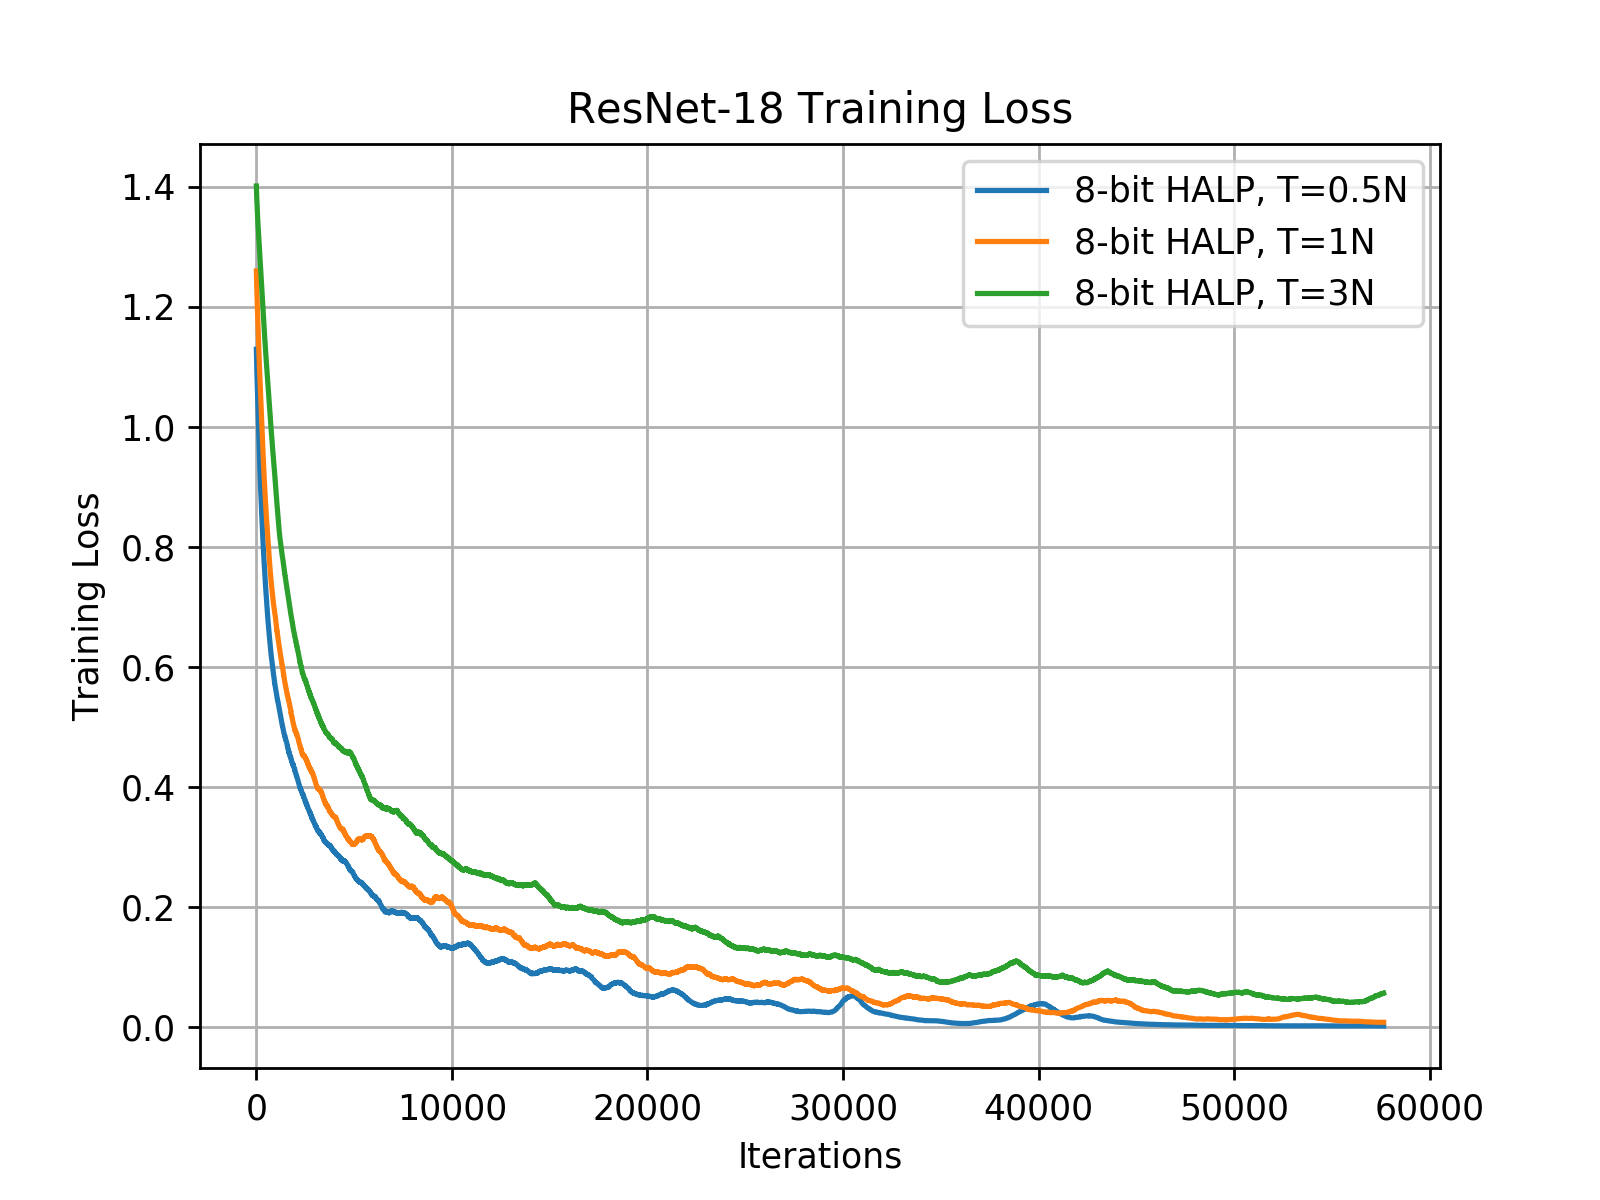

<IPython.core.display.Javascript object>


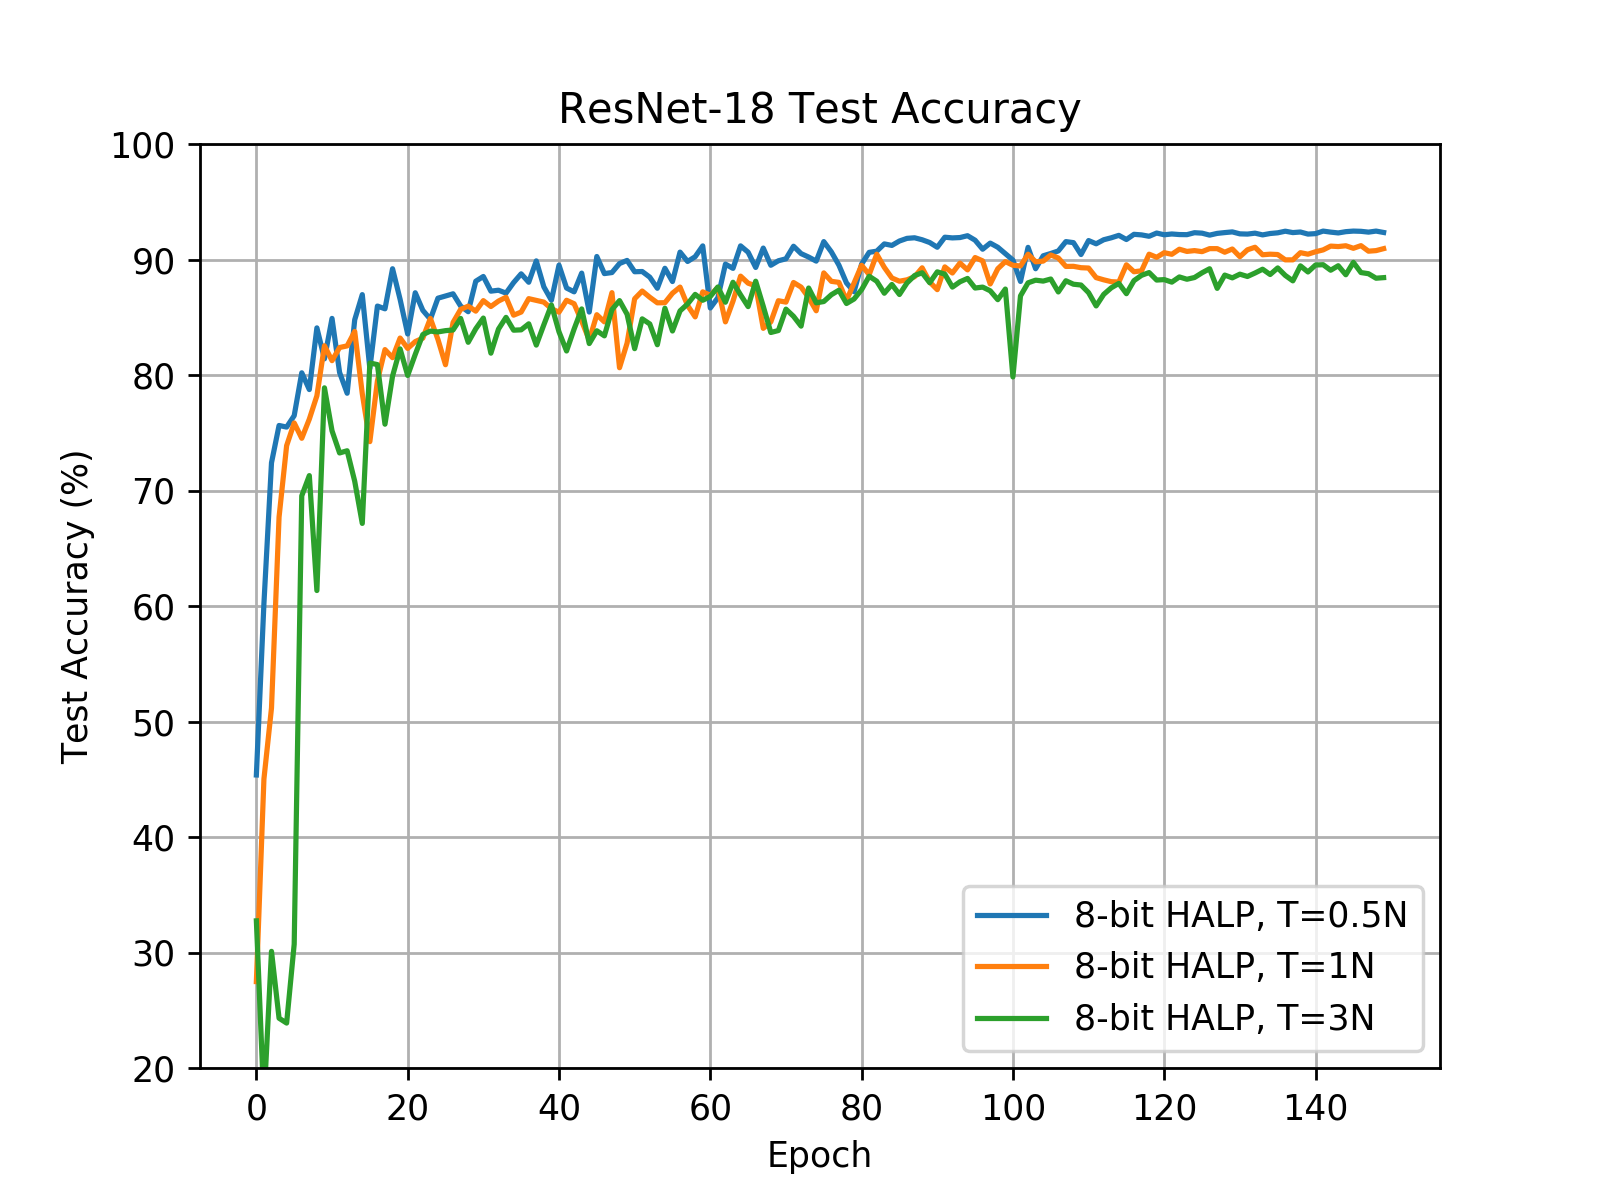

In [41]:
plt.figure()
plt.plot(running_mean(halp_b8_T165_train, 1000), label="8-bit HALP, T=0.5N")
plt.plot(running_mean(halp_b8_T391_train, 1000), label="8-bit HALP, T=1N")
plt.plot(running_mean(halp_b8_T1173_train, 1000), label="8-bit HALP, T=3N")
plt.grid()
plt.title("ResNet-18 Training Loss")
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

plt.figure()
plt.plot(halp_b8_T165_test, label="8-bit HALP, T=0.5N")
plt.plot(halp_b8_T391_test, label="8-bit HALP, T=1N")
plt.plot(halp_b8_T1173_test, label="8-bit HALP, T=3N")
plt.grid()
plt.ylim([20, 100])
plt.title("ResNet-18 Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy (%)')
plt.show()

## Sweep Number of Bits 
Then we sweep the number of bits used for the model offset, holding T=1N and maintaining the same hyperparameter settings for l2-regularization and learning rate as before. We are able to recover comparable test performance with 4-bit and 8-bit HALP, but seem a significant performance degradation with 2-bit HALP. 

<IPython.core.display.Javascript object>


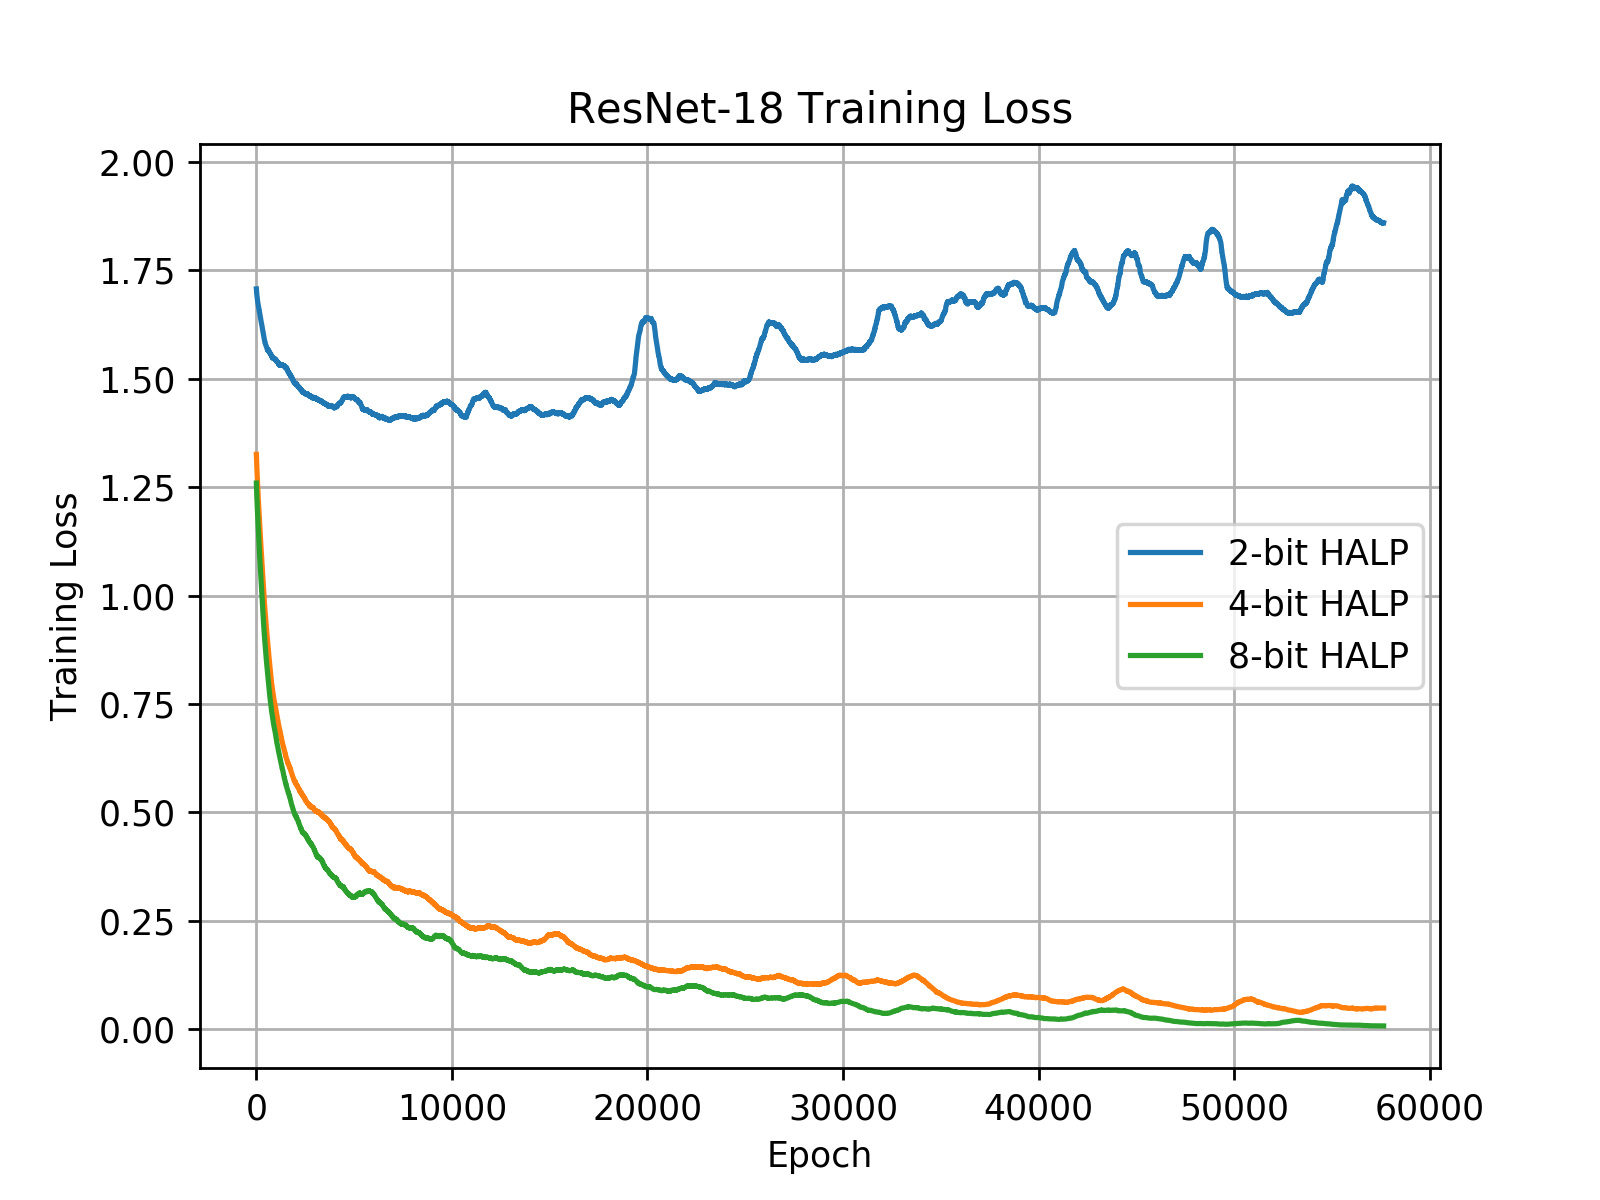

<IPython.core.display.Javascript object>


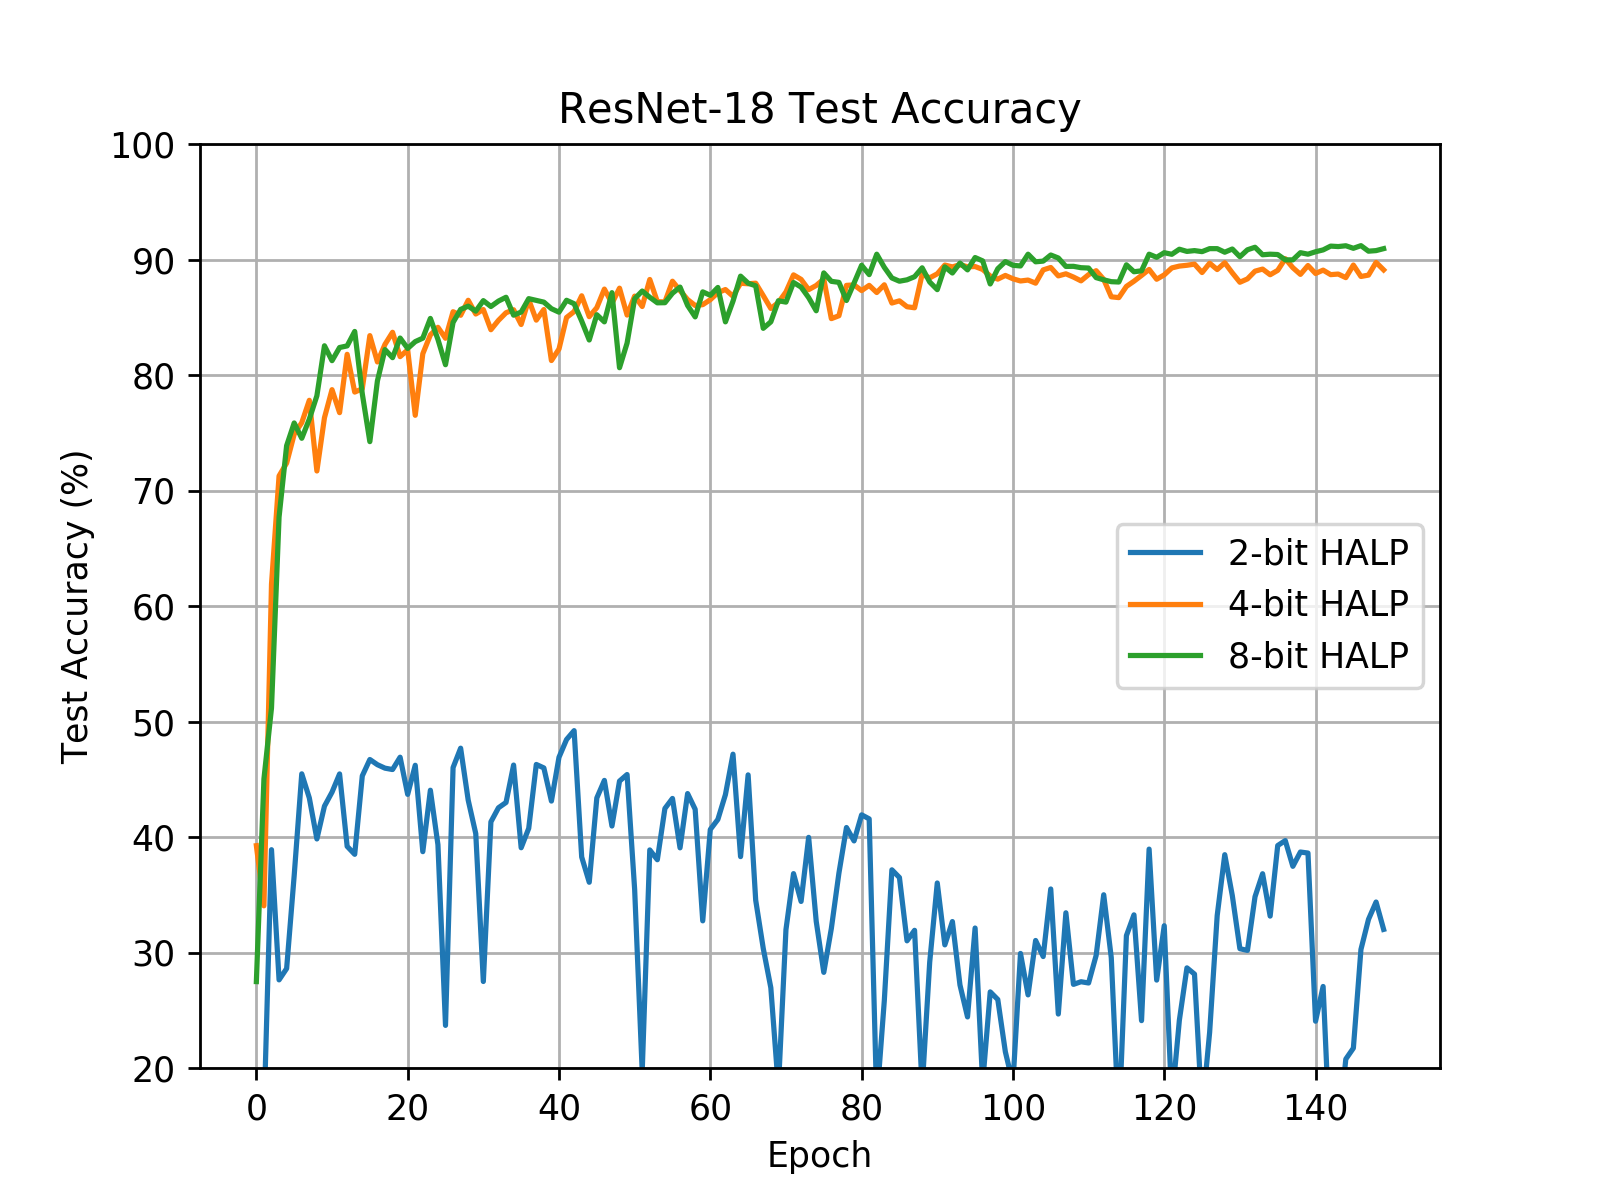

In [42]:
plt.figure()
plt.plot(running_mean(halp_b2_T391_train, 1000), label="2-bit HALP")
plt.plot(running_mean(halp_b4_T391_train, 1000), label="4-bit HALP")
plt.plot(running_mean(halp_b8_T391_train, 1000), label="8-bit HALP")
plt.grid()
plt.title("ResNet-18 Training Loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

plt.figure()
plt.plot(halp_b2_T391_test, label="2-bit HALP")
plt.plot(halp_b4_T391_test, label="4-bit HALP")
plt.plot(halp_b8_T391_test, label="8-bit HALP")
plt.grid()
plt.ylim([20, 100])
plt.title("ResNet-18 Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy (%)')
plt.show()